# Experiment 2
## Implement SVM/Softmax classifier for CIFAR-10 dataset: (i) using KNN, (ii) using 3 layer neural network

In [ ]:

import tensorflow as tf  
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.metrics import classification_report,confusion_matrix

Loading dataset

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


Visualizing images

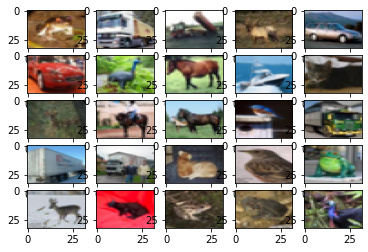

In [ ]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()

Image scaling

In [ ]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
 

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

# Reshaping images for KNN classifier
train_dataset,test_dataset= x_train,x_test 
train_set = train_dataset.reshape((50000,32*32*3))
test_set = test_dataset.reshape((10000,32*32*3))

KNN Model

In [ ]:
clf = neighbors.KNeighborsClassifier(5)
clf.fit(train_set,y_train)
y_pred=clf.predict(test_set)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.38      0.54      0.45      1000
           1       0.65      0.20      0.31      1000
           2       0.23      0.45      0.30      1000
           3       0.29      0.22      0.25      1000
           4       0.24      0.51      0.33      1000
           5       0.39      0.22      0.28      1000
           6       0.35      0.25      0.29      1000
           7       0.68      0.21      0.32      1000
           8       0.40      0.66      0.50      1000
           9       0.70      0.14      0.23      1000

    accuracy                           0.34     10000
   macro avg       0.43      0.34      0.33     10000
weighted avg       0.43      0.34      0.33     10000



array([[537,   4, 117,  13,  59,   7,  26,   5, 225,   7],
       [139, 205, 110,  42, 155,  36,  61,  10, 217,  25],
       [107,   3, 452,  52, 226,  34,  66,   8,  49,   3],
       [ 70,   8, 234, 217, 193, 115,  95,  17,  46,   5],
       [ 64,   1, 262,  35, 514,  21,  41,   7,  53,   2],
       [ 71,   3, 227, 155, 187, 220,  66,  14,  51,   6],
       [ 27,   2, 273,  68, 314,  37, 248,   2,  28,   1],
       [ 93,  10, 181,  50, 280,  52,  53, 210,  67,   4],
       [141,  14,  52,  38,  54,  16,  14,   8, 655,   8],
       [153,  67,  98,  68, 124,  23,  46,  29, 252, 140]])

ANN  Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50)




Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 20s 13ms/step - loss: 1.9890 - accuracy: 0.2847
Epoch 2/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.8338 - accuracy: 0.3518
Epoch 3/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.7638 - accuracy: 0.3795
Epoch 4/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.7083 - accuracy: 0.3980
Epoch 5/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6626 - accuracy: 0.4147
Epoch 6/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6271 - accuracy: 0.4276
Epoch 7/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5993 - accuracy: 0.4385
Epoch 8/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5757 - accuracy: 0.4447
Epoch 9/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5547 - accuracy: 0.4520
Epoch 10/50
1563/1563 [==============================] - 20s 13ms/step - lo

ANN Model evaluation

In [ ]:
 
model.evaluate(x_test, y_test, verbose = 1)

313/313 [==============================] - 2s 6ms/step - loss: 1.3586 - accuracy: 0.5202


[1.358647346496582, 0.5202000141143799]